Mean squared error: 12.425274848937988
R-squared: 0.7641493740399432

In [1]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

import joblib

In [2]:
pd.options.display.max_columns = 20000
pd.set_option('display.width', 1000)

In [3]:
# Get the absolute path of the current working directory
current_dir = os.path.abspath(os.getcwd())

# Get the absolute path of the parent directory
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))

In [18]:
# Read in the input and output feather files
fp_input = os.path.join(parent_dir, 'data', 'input.feather')
fp_output = os.path.join(parent_dir, 'data', 'output.feather')

In [19]:
# Load the dataset using pandas
input = pd.read_feather(fp_input)
output = pd.read_feather(fp_output)

In [20]:
output.head()

,color_sources_W,color_sources_U,color_sources_B,color_sources_R,color_sources_G,color_sources_C,number_of_lands
0,17,18,0,16,0,0,33
1,0,0,24,16,0,0,25
2,0,0,19,15,14,0,24
3,23,2,2,2,18,6,24
4,0,5,15,0,18,2,21


In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)

In [29]:
# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(7)
])

# Compile the model with optimizer and loss function
model.compile(optimizer='adam', loss='mse')

# Train the model with the training set
model.fit(X_train, y_train, epochs=3200, batch_size=32)

Epoch 1/3200
233/233 [==============================] - 1s 850us/step - loss: 31.9545
Epoch 2/3200
233/233 [==============================] - 0s 841us/step - loss: 16.8576
Epoch 3/3200
233/233 [==============================] - 0s 850us/step - loss: 14.0508
Epoch 4/3200
233/233 [==============================] - 0s 815us/step - loss: 12.6968
Epoch 5/3200
233/233 [==============================] - 0s 824us/step - loss: 11.9203
Epoch 6/3200
233/233 [==============================] - 0s 884us/step - loss: 11.1550
Epoch 7/3200
233/233 [==============================] - 0s 854us/step - loss: 10.4913
Epoch 8/3200
233/233 [==============================] - 0s 828us/step - loss: 10.0550
Epoch 9/3200
233/233 [==============================] - 0s 824us/step - loss: 9.5879
Epoch 10/3200
233/233 [==============================] - 0s 818us/step - loss: 9.2350
Epoch 11/3200
233/233 [==============================] - 0s 812us/step - loss: 8.8988
Epoch 12/3200
233/233 [==============================] 

In [25]:
# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(7)
])

# Compile the model with optimizer and loss function
model.compile(optimizer='adam', loss='mse')

# Train the model with the training set
model.fit(X_train, y_train, epochs=1000, batch_size=32)

Epoch 1/1000
233/233 [==============================] - 1s 759us/step - loss: 40.4776
Epoch 2/1000
233/233 [==============================] - 0s 746us/step - loss: 20.2379
Epoch 3/1000
233/233 [==============================] - 0s 764us/step - loss: 16.9345
Epoch 4/1000
233/233 [==============================] - 0s 755us/step - loss: 15.1171
Epoch 5/1000
233/233 [==============================] - 0s 746us/step - loss: 14.0378
Epoch 6/1000
233/233 [==============================] - 0s 755us/step - loss: 13.3349
Epoch 7/1000
233/233 [==============================] - 0s 755us/step - loss: 12.9014
Epoch 8/1000
233/233 [==============================] - 0s 751us/step - loss: 12.4751
Epoch 9/1000
233/233 [==============================] - 0s 751us/step - loss: 12.1066
Epoch 10/1000
233/233 [==============================] - 0s 764us/step - loss: 11.8030
Epoch 11/1000
233/233 [==============================] - 0s 768us/step - loss: 11.5239
Epoch 12/1000
233/233 [=============================

In [30]:
# Evaluate the accuracy of the model with the testing set
mse = model.evaluate(X_test, y_test)
print('Mean squared error:', mse)

59/59 [==============================] - 0s 673us/step - loss: 6.9778
Mean squared error: 6.977780342102051


In [31]:
# Use the trained model to make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the R-squared metric between the predicted and actual values
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

59/59 [==============================] - 0s 621us/step
R-squared: 0.8004157081663832


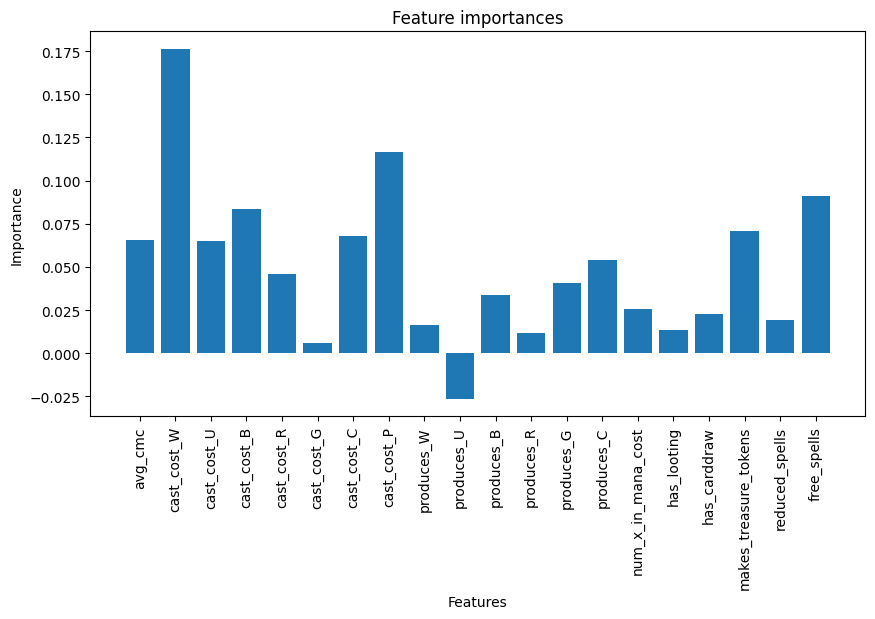

In [32]:
# Get the weights of the model's layers
weights = model.get_weights()

# Extract the weights of the input layer and the first dense layer
input_weights = weights[0]
dense_weights = weights[1]

# Calculate the absolute weights of the input features
abs_input_weights = np.abs(input_weights)

# Multiply the absolute weights of the input features with the weights of the first dense layer
feature_importances = np.dot(abs_input_weights, dense_weights)

# Normalize the feature importances
feature_importances /= np.sum(feature_importances)

# Get the feature names from the original dataset
feature_names = input.columns

# Plot the feature importances in a bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(input.shape[1]), feature_importances)
plt.xticks(range(input.shape[1]), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature importances')
plt.show()

In [33]:
fp = os.path.join(parent_dir, 'nn_lin_nfe_model.joblib.z')
joblib.dump(model, fp)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2024-10-01 17:27:44         2660
metadata.json                                  2024-10-01 17:27:44           64
variables.h5                                   2024-10-01 17:27:44       192416


['c:\\Users\\Peter\\Documents\\GitHub\\MTG-Land-Recommender\\nn_lin_nfe_model.joblib.z']